## Лабораторная работа по курсу \"Искусственный интеллект - Машинное обучение\"

| Студент | Ильин И.О. |
|---------|--------|
| Группа  | М8О-406Б-19      |

## Настройка среды

Устанавливаем все необходимые библиотеки:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

%matplotlib inline

И подгружаем наш датасет:

In [2]:
DATA_PATH = "dataset"
def load_data(data_path = DATA_PATH):
    csv_path = os.path.join(data_path, "AB_NYC_2019.csv")
    return pd.read_csv(csv_path)

Посмотрим, какие данные у нас есть:

In [3]:
data_set = load_data()
data_set.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
data_set.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
data_set.shape

(48895, 16)

In [6]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Теперь нам требуется поставить задачу, которую мы будем решать на основе наших данных.

### Задача предсказания - предсказать цену аппартаментов

## Описание наших данных

In [7]:
data_set.describe(include = "all")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


Теперь преобразуем исходные данные и удалим ненужные:

In [8]:
unnecessary = ['id', 'name', 'host_id', 'host_name', 'last_review']
clean_data_set = data_set.drop(unnecessary, axis = 1)

In [9]:
clean_data_set.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [10]:
clean_data_set.shape

(48895, 11)

## Категориальные данные

In [11]:
clean_data_set.describe(include = "object")

,neighbourhood_group,neighbourhood,room_type
count,48895,48895,48895
unique,5,221,3
top,Manhattan,Williamsburg,Entire home/apt
freq,21661,3920,25409


Теперь следует переделать категориальные данные в числовые и нормировать.

room_type и neighbourhood_group можно переделать с помощью one_hot_encoder'a,
а neighbourhood с помощью label_encoder'a.

In [12]:
label_encoder = LabelEncoder()
label = pd.DataFrame({'neighbourhood': label_encoder.fit_transform(clean_data_set['neighbourhood'])})

encode_data = clean_data_set[['neighbourhood_group', 'room_type']].copy()
CT = ColumnTransformer([("OneHot", OneHotEncoder(), [0, 1])])
onehot = pd.DataFrame(CT.fit_transform(encode_data).toarray(),
         columns = ['group_0', 'group_1', 'group_2', 'group_3', 'group_4', 'room_0', 'room_1', 'room_2'])

In [13]:
encode_data = pd.concat([clean_data_set.drop(columns = ['neighbourhood_group', 'neighbourhood', 'room_type']),
                         label, onehot], axis = 1, sort = False)
encode_data.shape

(48895, 17)

### Числовые данные

In [14]:
encode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        48895 non-null  float64
 1   longitude                       48895 non-null  float64
 2   price                           48895 non-null  int64  
 3   minimum_nights                  48895 non-null  int64  
 4   number_of_reviews               48895 non-null  int64  
 5   reviews_per_month               38843 non-null  float64
 6   calculated_host_listings_count  48895 non-null  int64  
 7   availability_365                48895 non-null  int64  
 8   neighbourhood                   48895 non-null  int64  
 9   group_0                         48895 non-null  float64
 10  group_1                         48895 non-null  float64
 11  group_2                         48895 non-null  float64
 12  group_3                         

Заполним пропуски:

In [15]:
total = encode_data.isnull().sum().sort_values(ascending = False)
percent = (encode_data.isnull().sum() / encode_data.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data

,Total,Percent
reviews_per_month,10052,0.205583
latitude,0,0.000000
group_0,0,0.000000
room_1,0,0.000000
room_0,0,0.000000
group_4,0,0.000000
group_3,0,0.000000
group_2,0,0.000000
group_1,0,0.000000
neighbourhood,0,0.000000


In [16]:
mean = encode_data['reviews_per_month'].mean()
encode_data['reviews_per_month'].fillna(mean, inplace = True)
encode_data.isnull().sum()

latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
neighbourhood                     0
group_0                           0
group_1                           0
group_2                           0
group_3                           0
group_4                           0
room_0                            0
room_1                            0
room_2                            0
dtype: int64

## Пронормируем

In [17]:
scaling = StandardScaler()
encode_data[:] = scaling.fit_transform(encode_data)
encode_data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,group_0,group_1,group_2,group_3,group_4,room_0,room_1,room_2
0,-1.493849,-0.437652,-0.015493,-0.293996,-0.320414,-0.776641,-0.034716,1.916250,0.012762,-0.151071,1.196705,-0.891833,-0.362035,-0.087677,-1.040134,1.090893,-0.155887
1,0.452436,-0.684639,0.300974,-0.293996,0.487665,-0.663138,-0.156104,1.840275,0.289156,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,0.961415,-0.916680,-0.155887
2,1.468399,0.222497,-0.011329,-0.196484,-0.522433,0.000000,-0.186451,1.916250,-0.190897,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,-1.040134,1.090893,-0.155887
3,-0.803398,-0.164450,-0.265335,-0.293996,5.538156,2.181110,-0.186451,0.617065,-0.961892,-0.151071,1.196705,-0.891833,-0.362035,-0.087677,0.961415,-0.916680,-0.155887
4,1.275660,0.177216,-0.302811,0.144807,-0.320414,-0.850084,-0.186451,-0.856865,-0.670950,-0.151071,-0.835628,1.121286,-0.362035,-0.087677,0.961415,-0.916680,-0.155887


## Распределение

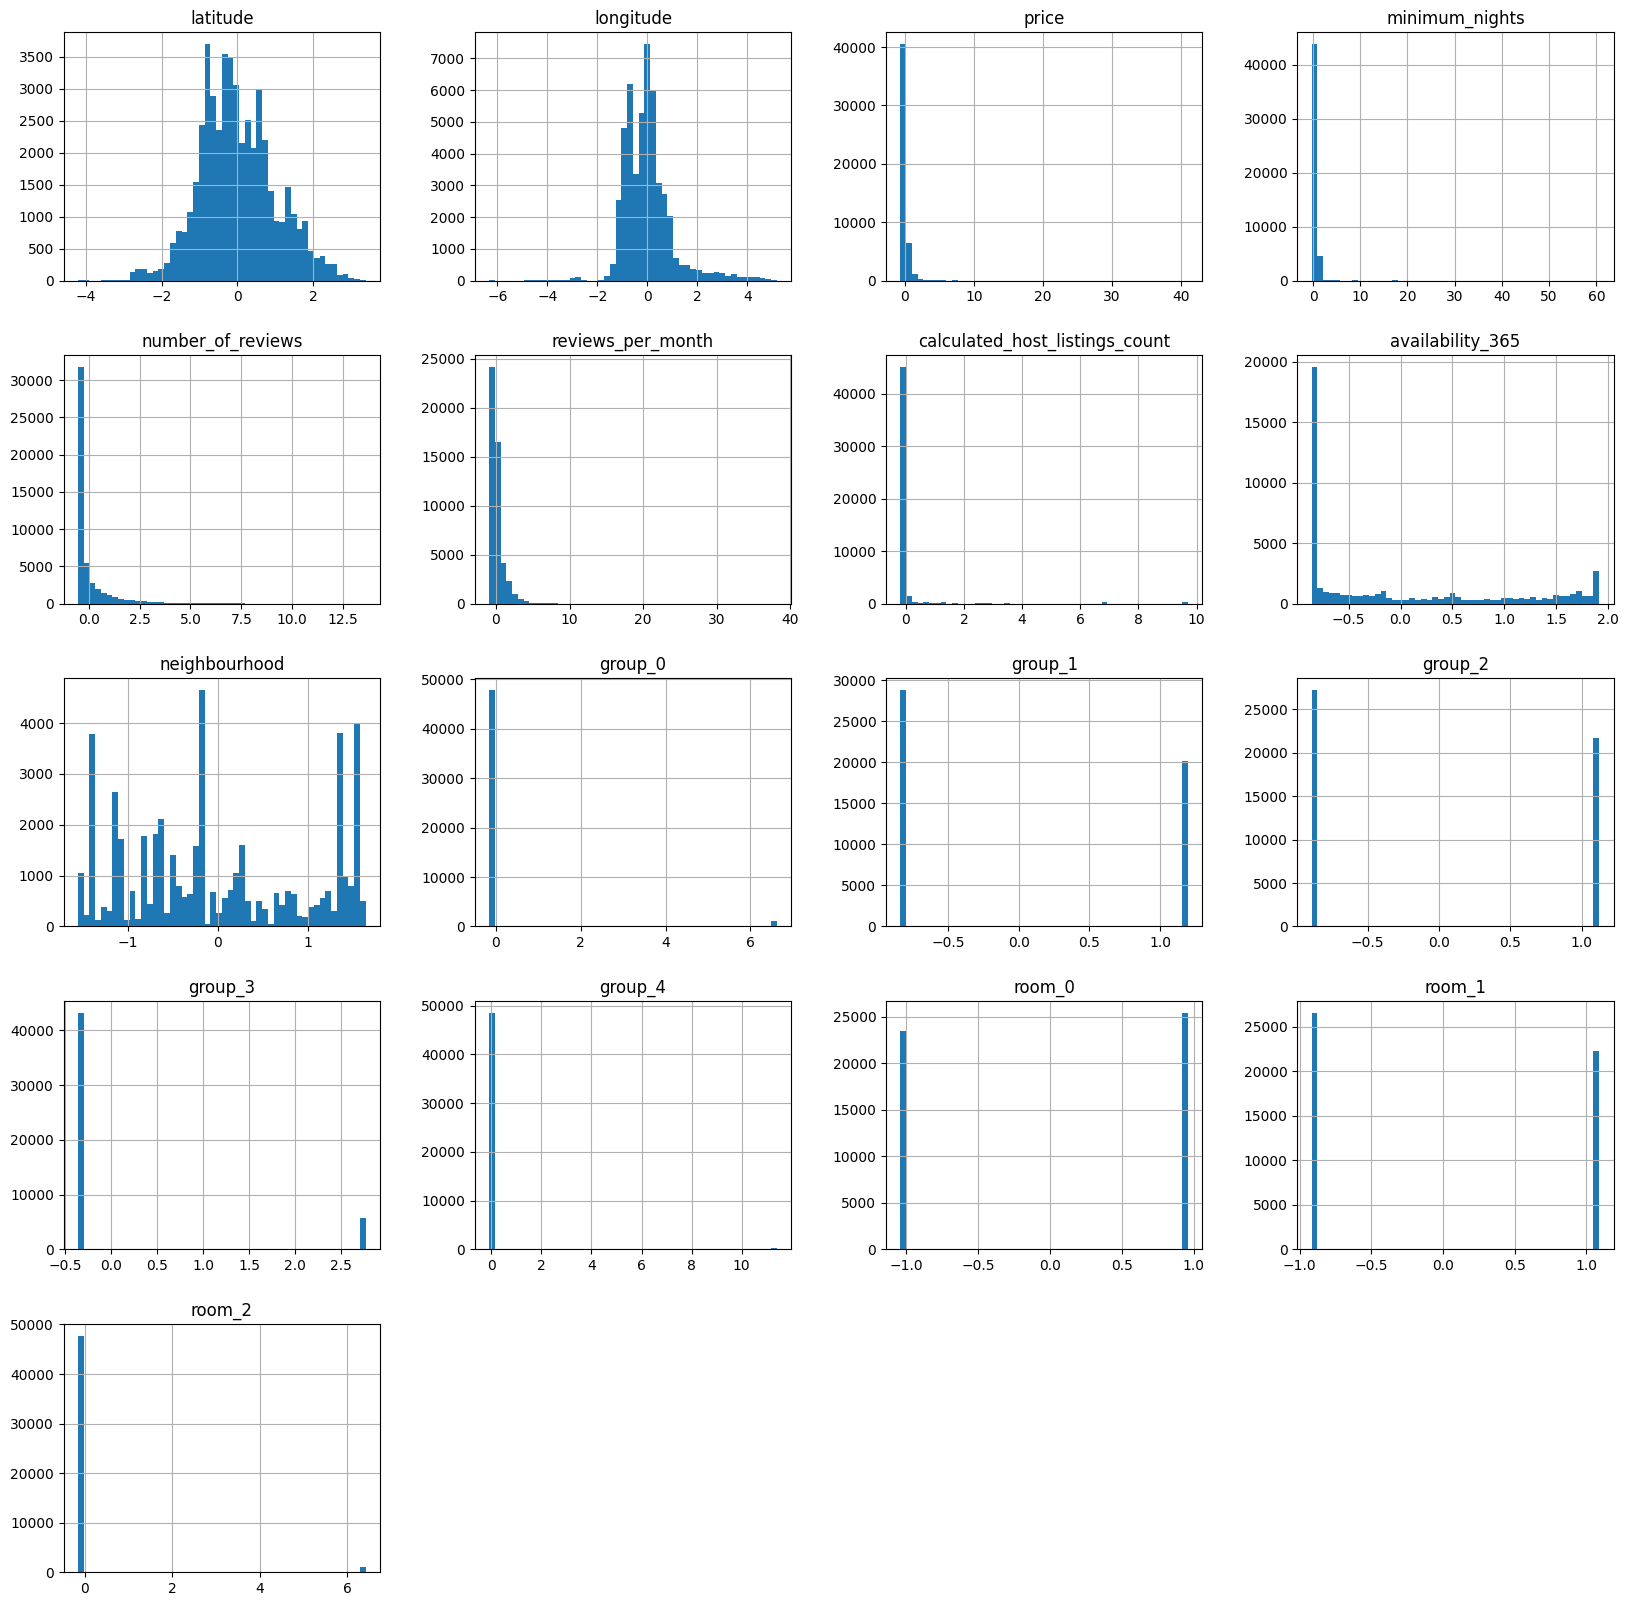

In [18]:
encode_data.hist(bins = 50, figsize = (20, 20))
plt.show()

## Визуализация и анализ данных

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

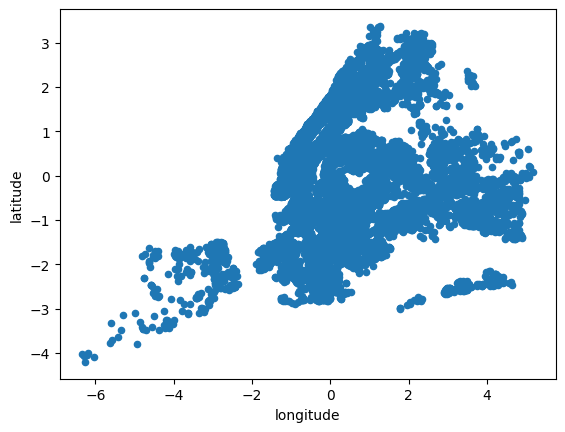

In [19]:
encode_data.plot(kind = "scatter", x = "longitude", y = "latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

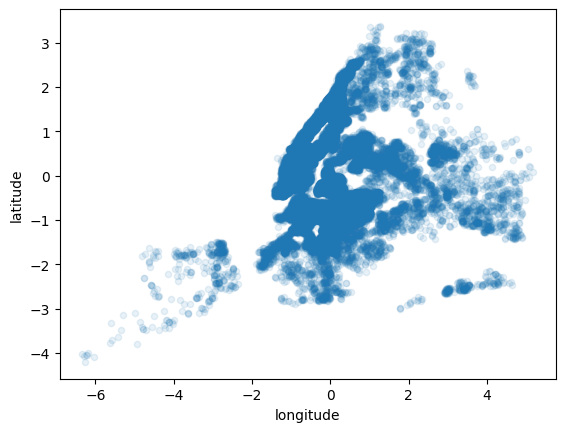

In [20]:
encode_data.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

### Корреляция

In [21]:
corr_matrix = encode_data.corr()

In [22]:
corr_matrix["price"].sort_values(ascending = False) 

price                             1.000000
room_0                            0.255857
group_2                           0.163976
availability_365                  0.081829
neighbourhood                     0.062057
calculated_host_listings_count    0.057472
minimum_nights                    0.042799
latitude                          0.033939
group_4                          -0.013840
reviews_per_month                -0.022373
group_0                          -0.041030
number_of_reviews                -0.047954
room_2                           -0.053613
group_3                          -0.080205
group_1                          -0.098603
longitude                        -0.150019
room_1                           -0.240246
Name: price, dtype: float64

In [23]:
encode_data.shape

(48895, 17)

## Зависимость от главного значения

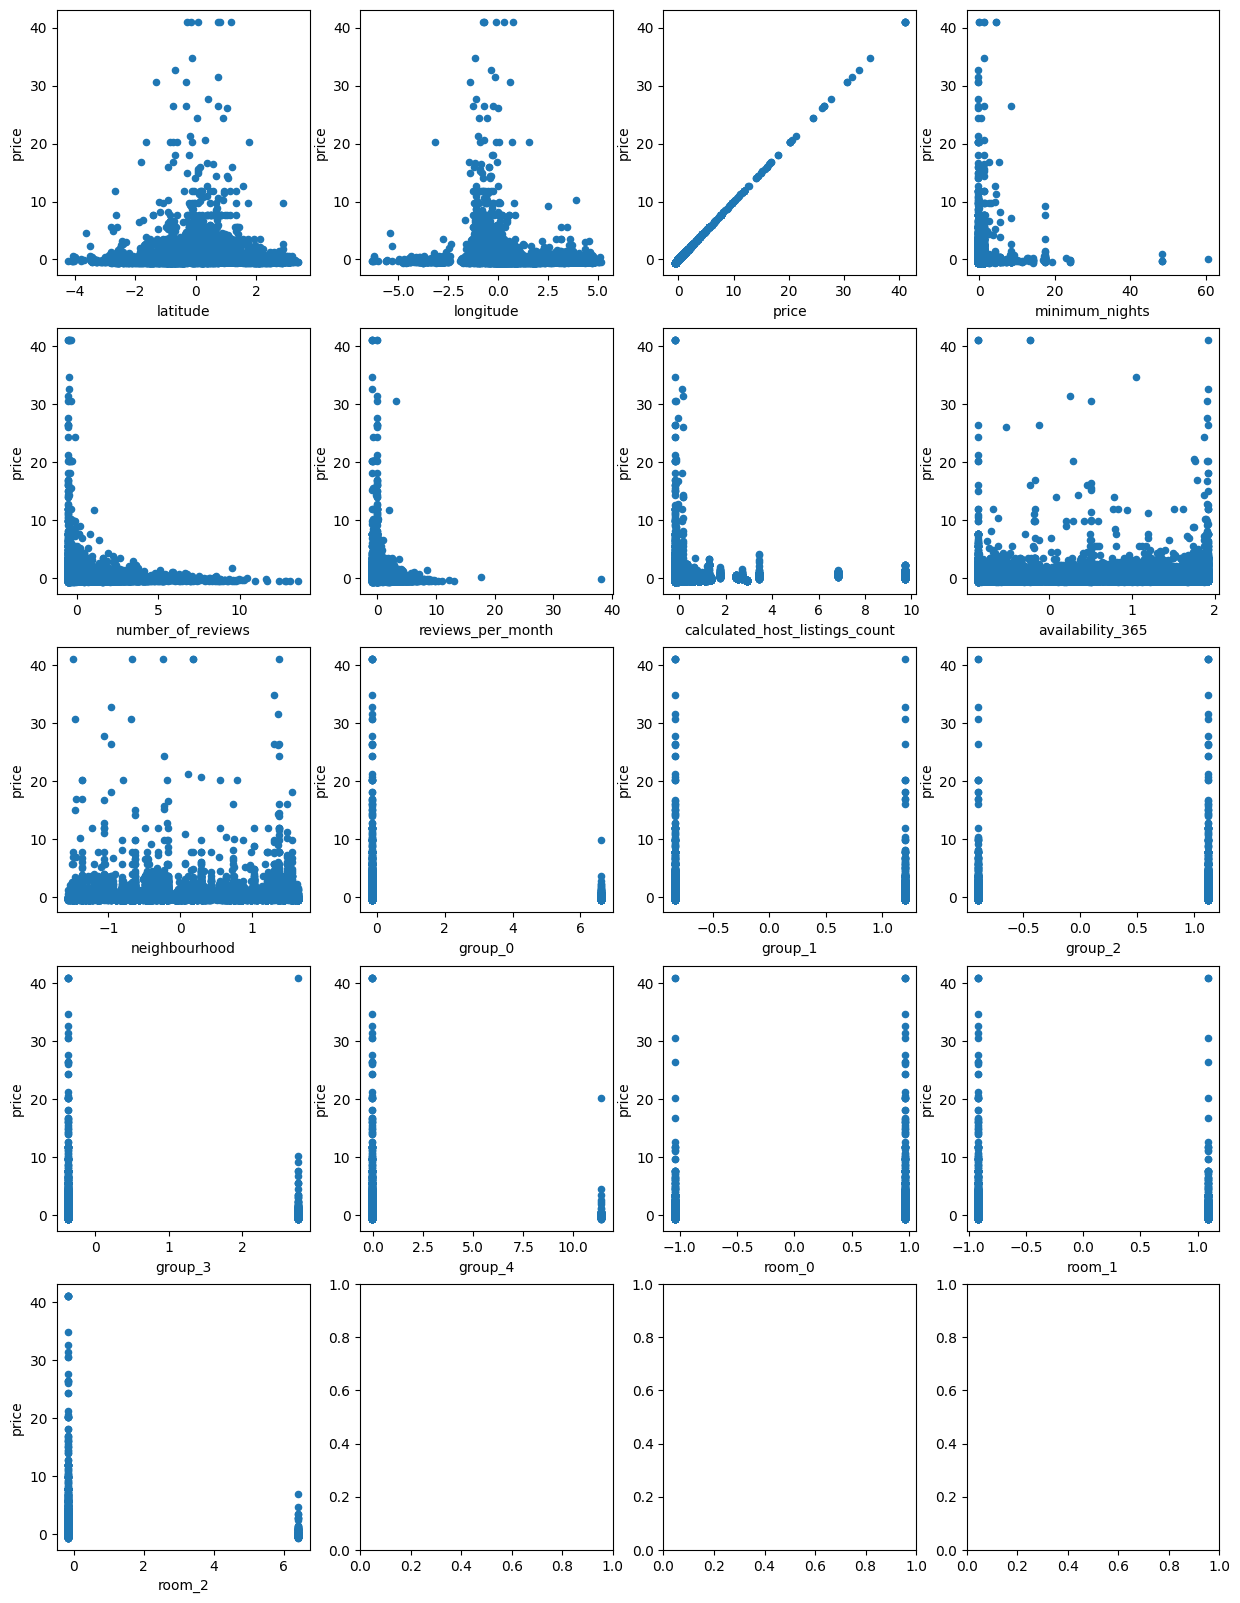

In [24]:
from pandas.plotting import scatter_matrix

fig, axs = plt.subplots(ncols = 4, nrows = 5, figsize = (15, 20))
i, j = 0, 0
for col in encode_data:
    encode_data.plot.scatter(x = col, y = 'price', ax = axs[i][j])
    j += 1
    if j == 4:
        j = 0
        i += 1